Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import seaborn as sb

In [10]:
flight = sb.load_dataset('flights')

In [9]:
flight.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
flight.shape

(144, 3)

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

NOTE: In the flights dataset of seaborn, there is no such column named prices. So from here, i will use the taxis dataset and perform the same operations on this dataset.

In [5]:
import matplotlib.pyplot as plt

In [11]:
cab_service = sb.load_dataset('taxis')

In [12]:
cab_service.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


(array([4.966e+03, 9.830e+02, 2.690e+02, 1.840e+02, 1.400e+01, 8.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([  1. ,  15.9,  30.8,  45.7,  60.6,  75.5,  90.4, 105.3, 120.2,
        135.1, 150. ]),
 <BarContainer object of 10 artists>)

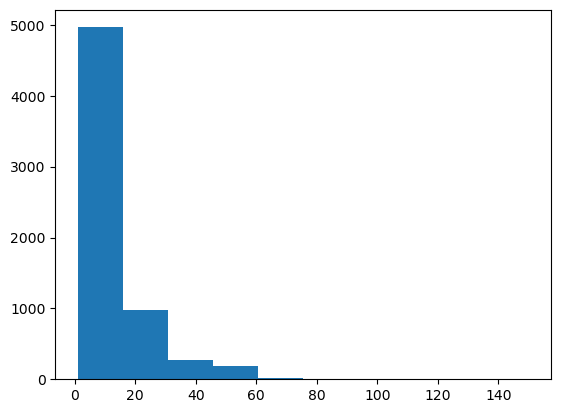

In [13]:
plt.hist(cab_service['fare'])

Q3. What is the range of fares in the taxis dataset? What is the minimum and maximum price?

In [15]:
cab_service['fare'].max()

150.0

In [16]:
cab_service['fare'].min()

1.0

Q4. How does the fare vary by distance? Create a boxplot to compare the fares for different distances.

<AxesSubplot: xlabel='fare', ylabel='distance'>

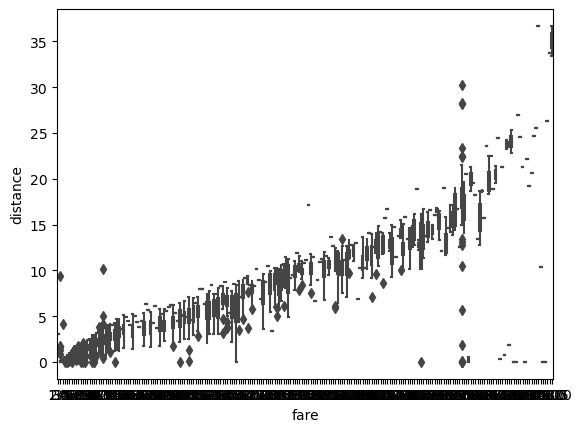

In [17]:
sb.boxplot(data=cab_service,x=cab_service['fare'],y=cab_service['distance'])

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

In [29]:
cab_sample = cab_service.iloc[30:55,:]

<AxesSubplot: xlabel='fare', ylabel='distance'>

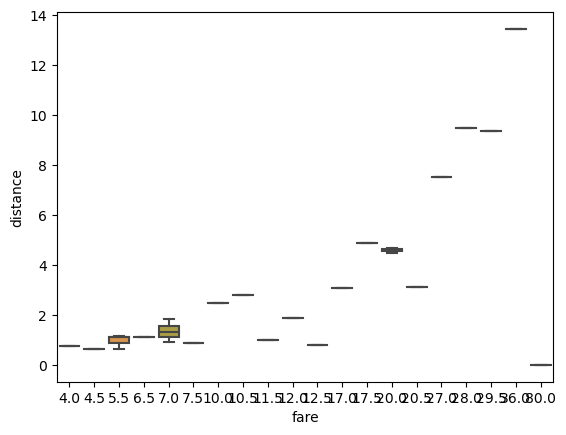

In [30]:
sb.boxplot(data=cab_sample,x=cab_sample['fare'],y=cab_sample['distance'])

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the fare to identify any trends in fares. What features would you analyze to identify these trends and what visualizations would you use to present your findings to your team?

<AxesSubplot: xlabel='fare', ylabel='pickup'>

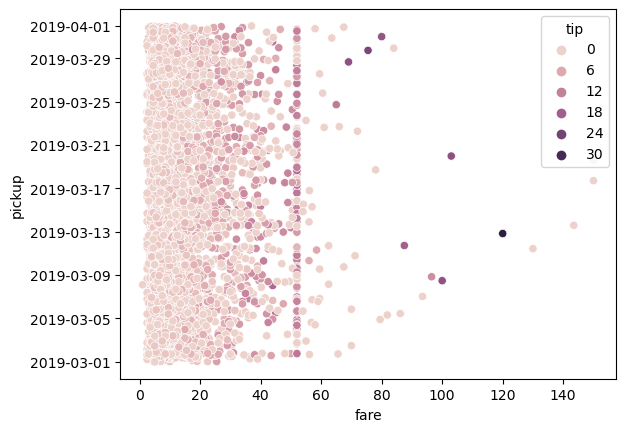

In [38]:
sb.scatterplot(x=cab_service['fare'],y=cab_service['pickup'],data=cab_service,hue='tip')

<AxesSubplot: xlabel='fare', ylabel='pickup'>

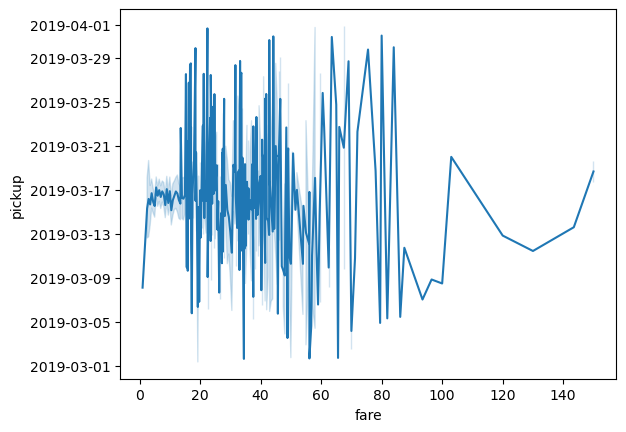

In [40]:
sb.lineplot(data=cab_service,x=cab_service['fare'],y=cab_service['pickup'])

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [71]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [48]:
google = pd.read_excel('playstore.xlsx')

In [49]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [50]:
google.shape

(299, 13)

Dimensions: 299 rows and 13 columns

Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

<AxesSubplot: xlabel='Rating', ylabel='Category'>

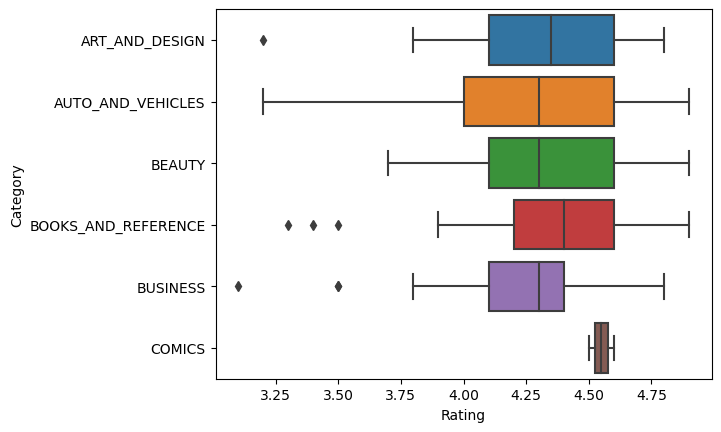

In [51]:
sb.boxplot(data=google,x=google['Rating'],y=google['Category'])

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [52]:
google.isnull().sum()

App                0
Category           0
Rating            11
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        1
Android Ver        0
dtype: int64

Yes, in this dataset we have 11 missing fields in Rating and 1 missing field in Current Version.

For rating column, we will replace these 11 missing fields with the mean of the ratings column.

In [53]:
google['New_Rating'] = google['Rating'].fillna(google['Rating'].mean())

In [54]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4.1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,3.9
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,4.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4.5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4.3


In [55]:
google[google['Current Ver'].isnull()].index

Int64Index([15], dtype='int64')

In [56]:
google.iloc[15:16,:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_Rating
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0.0,Everyone,Art & Design,2018-06-06,NaN,4.2 and up,3.2


There is only field in this column that is having nan value. As our dataset is huge, we can simply ignore or delete this particular row.

In [57]:
google.drop([15],axis=0,inplace=True)

In [58]:
google.isnull().sum()

App                0
Category           0
Rating            11
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
New_Rating         0
dtype: int64

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [59]:
google.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4.1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,3.9


In [60]:
google['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M'],
      dtype=object)

In [61]:
google['Size'] = google['Size'].str.replace('M','000000').str.replace('.','')

/tmp/ipykernel_95/3689271151.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  google['Size'] = google['Size'].str.replace('M','000000').str.replace('.','')


In [65]:
google['Size'] = google['Size'].str.replace('k','000')

In [66]:
google['Size'].unique()

array(['19000000', '14000000', '87000000', '25000000', '28000000',
       '56000000', '29000000', '33000000', '31000000', '12000000',
       '20000000', '21000000', '37000000', '55000000', '17000000',
       '39000000', '42000000', '70000000', '23000000', '60000000',
       '61000000', '46000000', '92000000', '52000000', '11000000',
       '24000000', 'Varies with device', '94000000', '15000000',
       '10000000', '26000000', '80000000', '79000000', '57000000',
       '35000000', '54000000', '201000', '36000000', '86000000',
       '27000000', '16000000', '34000000', '89000000', '38000000',
       '32000000', '18000000', '22000000', '45000000', '98000000',
       '90000000', '67000000', '30000000', '71000000', '74000000',
       '64000000', '82000000', '99000000', '49000000', '95000000',
       '50000000', '59000000', '13000000', '73000000', '68000000',
       '40000000', '72000000', '91000000', '23000', '65000000',
       '75000000', '51000000', '41000000', '48000000', '85000000'],
 

In [67]:
google['Size'] = google['Size'].str.replace('Varies with device','10000000')

In [69]:
google['Size'].unique()

array(['19000000', '14000000', '87000000', '25000000', '28000000',
       '56000000', '29000000', '33000000', '31000000', '12000000',
       '20000000', '21000000', '37000000', '55000000', '17000000',
       '39000000', '42000000', '70000000', '23000000', '60000000',
       '61000000', '46000000', '92000000', '52000000', '11000000',
       '24000000', '10000000', '94000000', '15000000', '26000000',
       '80000000', '79000000', '57000000', '35000000', '54000000',
       '201000', '36000000', '86000000', '27000000', '16000000',
       '34000000', '89000000', '38000000', '32000000', '18000000',
       '22000000', '45000000', '98000000', '90000000', '67000000',
       '30000000', '71000000', '74000000', '64000000', '82000000',
       '99000000', '49000000', '95000000', '50000000', '59000000',
       '13000000', '73000000', '68000000', '40000000', '72000000',
       '91000000', '23000', '65000000', '75000000', '51000000',
       '41000000', '48000000', '85000000'], dtype=object)

Text(0, 0.5, 'Rating')

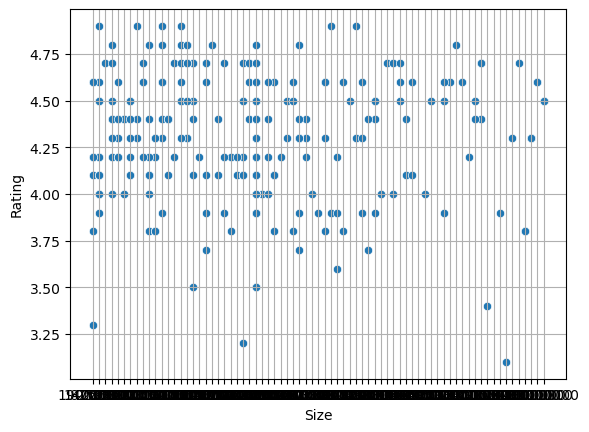

In [75]:
sb.scatterplot(x=google['Size'],y=google['Rating'],data=google)
plt.grid(True)
plt.xlabel('Size')
plt.ylabel('Rating')

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [76]:
google.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4.1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,3.9


<AxesSubplot: xlabel='Type', ylabel='Price'>

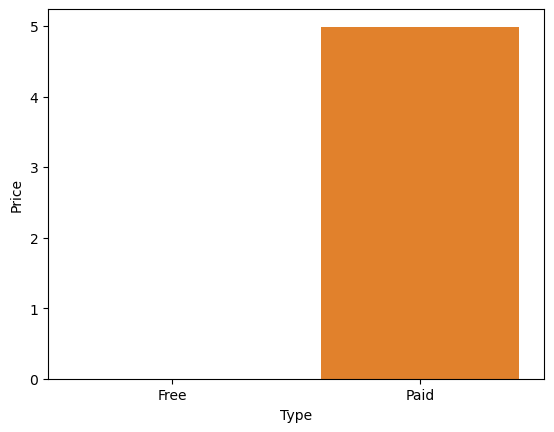

In [77]:
sb.barplot(data=google,x=google['Type'],y=google['Price'])

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [78]:
google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,New_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4.1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,3.9
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,87000000,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,4.7


In [80]:
google['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+'], dtype=object)

In [81]:
google['Installs'] = google['Installs'].str.replace('+','').str.replace(',','')

/tmp/ipykernel_95/2857520013.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  google['Installs'] = google['Installs'].str.replace('+','').str.replace(',','')


In [82]:
google['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000'],
      dtype=object)